In [ ]:
#Analysis:
The Bar Graph analysis showed that there was the same amount of mice in all treatments except for 1 less mouse treated with Stelasyn. This bar chart
also shows a total amount of mice which came out to be 249. 
Unfortunately I could not calculate the correlation or regression analysisbetween average mouse weight and average tumor volume but that is something I will continue to fix so that I can get a better read on the analysis provided by the data.



In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "Data/Mouse_metadata.csv"
study_results_path = "Data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.DataFrame(mouse_metadata)
study_df = pd.DataFrame(study_results)
data_df = pd.merge(mouse_df, study_df, how='inner')
data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice in the DataFrame.
data_df.rename(columns={'Mouse ID': 'ID'}, inplace=True)
mice_count = len(data_df.ID.unique())
print(f'NUMBER OF MICE: {mice_count}')

NUMBER OF MICE: 249


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_data_df = pd.DataFrame(data_df[data_df.duplicated(['ID', 'Timepoint'])])
print(duplicate_data_df)

       ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909  g989     Propriva  Female          21          26          0   
911  g989     Propriva  Female          21          26          5   
913  g989     Propriva  Female          21          26         10   
915  g989     Propriva  Female          21          26         15   
917  g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = data_df.drop_duplicates(subset='ID')
clean_df

,ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_count = len(clean_df.ID.unique())
print(f'NUMBER OF MICE: {mice_count}')

NUMBER OF MICE: 249


In [ ]:
#Summary Statistics

In [8]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
median = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
var = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
std = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
sem = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()

summary_stat = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":var, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})
# Display the Summary statistics table grouped by 'Drug Regimen' column
summary_stat

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,45.0,45.0,0.0,0.0,0.0
Ceftamin,45.0,45.0,0.0,0.0,0.0
Infubinol,45.0,45.0,0.0,0.0,0.0
Ketapril,45.0,45.0,0.0,0.0,0.0
Naftisol,45.0,45.0,0.0,0.0,0.0
Placebo,45.0,45.0,0.0,0.0,0.0
Propriva,45.0,45.0,0.0,0.0,0.0
Ramicane,45.0,45.0,0.0,0.0,0.0
Stelasyn,45.0,45.0,0.0,0.0,0.0


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen 
#stat = ['mean', 'median', 'var', 'std', 'sem']
# Using the aggregation method, produce the same summary statistics in a single line
summary_agg =  clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg

Tumor Volume (mm3)                      
                           mean median  var  std  sem
Drug Regimen                                         
Capomulin                  45.0   45.0  0.0  0.0  0.0
Ceftamin                   45.0   45.0  0.0  0.0  0.0
Infubinol                  45.0   45.0  0.0  0.0  0.0
Ketapril                   45.0   45.0  0.0  0.0  0.0
Naftisol                   45.0   45.0  0.0  0.0  0.0
Placebo                    45.0   45.0  0.0  0.0  0.0
Propriva                   45.0   45.0  0.0  0.0  0.0
Ramicane                   45.0   45.0  0.0  0.0  0.0
Stelasyn                   45.0   45.0  0.0  0.0  0.0
Zoniferol                  45.0   45.0  0.0  0.0  0.0

In [ ]:
#Bar and Pie Charts 

In [10]:
#first create a group series using the 'Drug Regimen' column and, counting the number of data points for each Drug Regimen 
mice_count = clean_df["Drug Regimen"].value_counts()
mice_count

Drug Regimen
Ramicane     25
Capomulin    25
Infubinol    25
Placebo      25
Ceftamin     25
Zoniferol    25
Ketapril     25
Propriva     25
Naftisol     25
Stelasyn     24
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of Mice per Treatment')

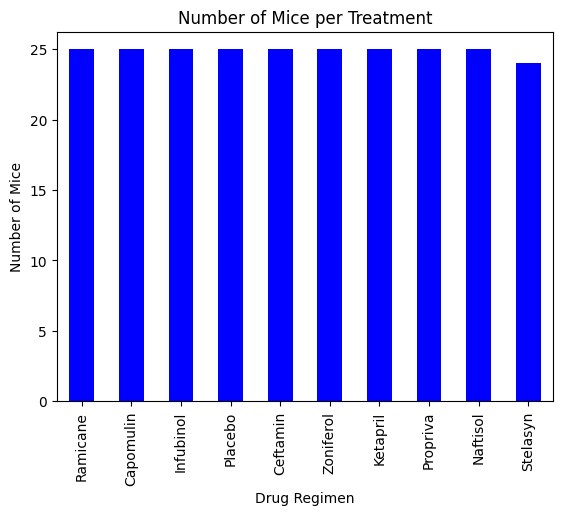

In [11]:
# Create a Pandas bar plot based off of the group series from before and label the title
plot_pandas = mice_count.plot.bar(color='b')  
# Set the xlabel, ylabel, and title using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")

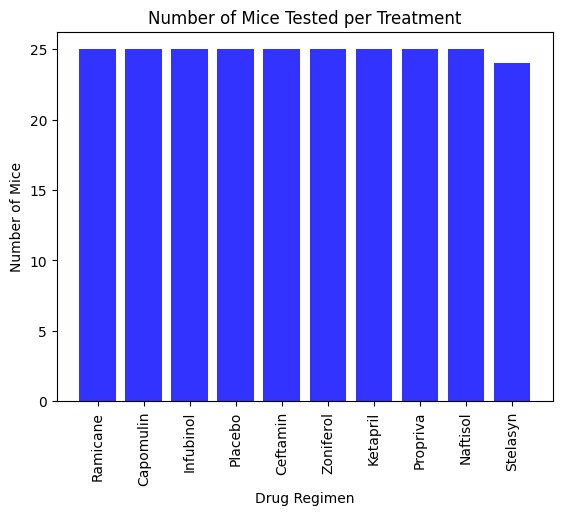

In [12]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = mice_count.index.values
y_axis = mice_count.values

# Create a Pyplot bar plot based off of the group series from before and label the title
plt.bar(x_axis, y_axis, color='b', alpha=0.8, align='center')

# Set the xlabel and ylabel, title using class methods
plt.title("Number of Mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")

plt.show()

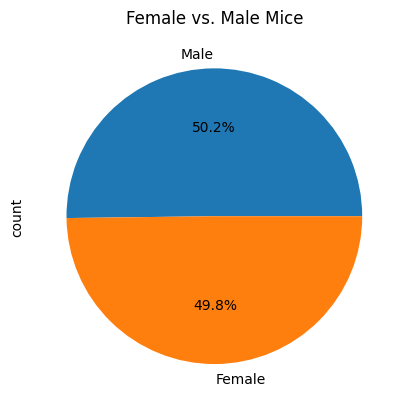

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_data = clean_df["Sex"].value_counts()
plt.title("Female vs. Male Mice")
gender_data.plot.pie(autopct= "%1.1f%%")
plt.show()

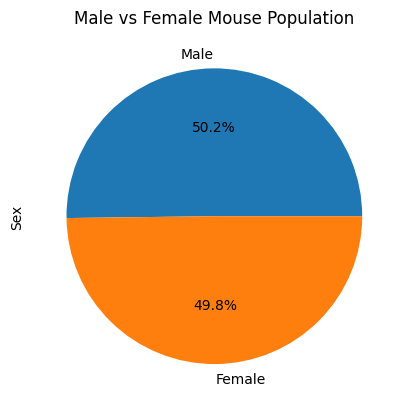

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = [49.7999197, 50.200803]
plot = gender_data.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')
plt.show()

In [19]:
#Quartiles,Outliers,and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.

final_volume = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sum()
print(final_volume)

Drug Regimen
Capomulin    1125.0
Ceftamin     1125.0
Infubinol    1125.0
Ketapril     1125.0
Naftisol     1125.0
Placebo      1125.0
Propriva     1125.0
Ramicane     1125.0
Stelasyn     1080.0
Zoniferol    1125.0
Name: Tumor Volume (mm3), dtype: float64


In [23]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
IQR = final_volume.quantile([.25]) - final_volume.quantile([.75])

print(f'IQR = {IQR}')

## Ceftamin
## Infubinol
## Capomulin
## Ramicane 

IQR = 0.25   NaN
0.75   NaN
Name: Tumor Volume (mm3), dtype: float64


In [ ]:
#Confused on how to calculate box plot and variance 

In [ ]:
#Line and Scatter Plot

In [26]:
Capomulin_mice_df = data_df[data_df['Drug Regimen'] == 'Capomulin']
print(Capomulin_mice_df)

        ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
10    s185    Capomulin  Female           3          17          0   
11    s185    Capomulin  Female           3          17          5   
12    s185    Capomulin  Female           3          17         10   
13    s185    Capomulin  Female           3          17         15   
14    s185    Capomulin  Female           3          17         20   
...    ...          ...     ...         ...         ...        ...   
440   i557    Capomulin  Female           1          24         45   
1452  r157    Capomulin    Male          22          25          0   
1453  r157    Capomulin    Male          22          25          5   
1454  r157    Capomulin    Male          22          25         10   
1455  r157    Capomulin    Male          22          25         15   

      Tumor Volume (mm3)  Metastatic Sites  
10             45.000000                 0  
11             43.878496                 0  
12             37.614948

Text(0, 0.5, 'Tumor Volume')

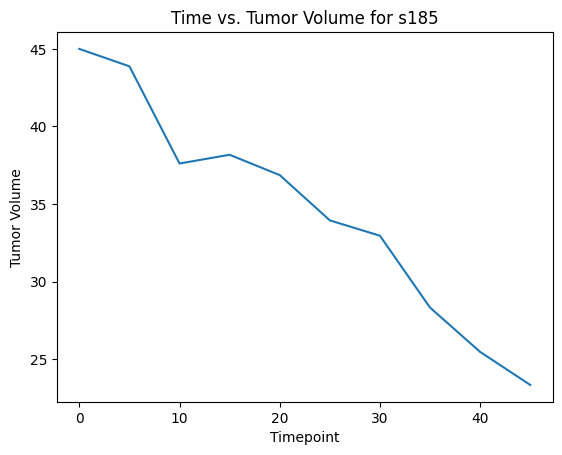

In [27]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

df3 = Capomulin_mice_df[Capomulin_mice_df['ID'] == 's185']  # Say hello to s185!

plt.plot(df3['Timepoint'], df3['Tumor Volume (mm3)'])
plt.title('Time vs. Tumor Volume for s185')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')

KeyError: 'Mouse ID'

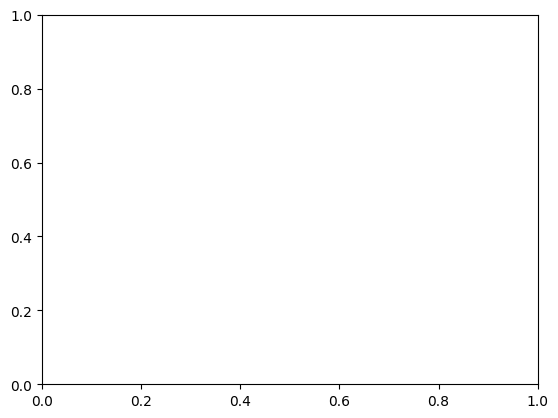

In [32]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#fig1, ax1 = plt.subplots()
#avg_capm_vol =Capomulin_df.groupby(['Mouse ID']).mean()

#marker_size=15
#plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'], color="blue")
#plt.title('Mouse Weight Versus Average Tumor Volume')
#plt.xlabel('Weight (g)',fontsize =14)
#plt.ylabel('Averag Tumor Volume (mm3)')

In [ ]:
#Correlation and Regression

In [36]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

regression = st.linregress(df5_weight, df5_vol)
print(regression)
regression_equation = f"y = {round(regression.slope, 3)}*x + {round(regression.intercept, 3)}"
regression_function = (df5_weight * regression.slope) + regression.intercept 
print(regression_equation)

corr_coeff = st.spearmanr(df5_weight, df5_vol)
print(f'Spearman test yields {corr_coeff} values for correlation')

plt.plot(df5_weight, regression_function,"r-")
plt.annotate(regression_equation,(15,41),color="red")
plt.scatter(df5_weight, df5_vol)
plt.ylabel("Avg. Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.title("Weight vs. Average Tumor Size with Linear Regression (Capomulin)")

NameError: name 'df5_weight' is not defined

In [ ]:
#^ I am still slightly confused about how to exactly define a variable when I get NameError. 